In [18]:
%load_ext autoreload
%autoreload 2

import os
import cortex
import numpy as np
import matplotlib.pyplot as pl
import sys
import yaml
from scipy.stats import sem, ks_2samp

sys.path.append("..")

from prfpy.stimulus import PRFStimulus2D
from prfpy.grid import Iso2DGaussianGridder, CSS_Iso2DGaussianGridder, Norm_Iso2DGaussianGridder, DoG_Iso2DGaussianGridder
from prfpy.fit import Iso2DGaussianFitter, Norm_Iso2DGaussianFitter, DoG_Iso2DGaussianFitter, CSS_Iso2DGaussianFitter

from utils.utils import create_full_stim, roi_mask

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#import subject from freesurfer to pycortex database
#this only works if line 335 in cortex.freesurfer.py is commented out (the extra fp.readline())
#cortex.freesurfer.import_subj('sub-006', freesurfer_subject_dir='/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer', 
#                              whitematter_surf='smoothwm')



#create flatmaps with tksurfer, then run the folowing
#to be tested, to import flatmaps made with the procedure
#cortex.freesurfer.import_flat(subject, patch, hemis=['lh', 'rh'], sname=None,
#                flat_type='freesurfer',
#                freesurfer_subject_dir=None, clean=False)

In [2]:
#load data fsaverage sub 001

gauss = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-gauss_space-fsaverage.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_gridparams-norm_space-fsaverage.npy") 
norm_an = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_analytic.npy")
#norm_num = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_numerical.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-dog_space-fsaverage.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-css_space-fsaverage.npy")
norm_unbound = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_unbounded.npy")
norm_combined=np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_norm-iterparams-combined_space-fsaverage.npy")
norm_powell=np.load("/Users/marcoaqil/PRFMapping/Cartesius results sub-001/sub-001_iterparams-norm_space-fsaverage_powell.npy")
norm_num_fix = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_num_bounds_fixed.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/sub-001_nonzerovar-mask_space-fsaverage.npy")

norm_res = norm_num_fix

In [59]:
#load data fsnative sub 001
gauss = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-gauss_space-fsnative.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-css_space-fsnative.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsnative.npy")
nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_nonzerovar-mask_space-fsnative.npy")
timecourse = np.load('/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_timecourse_space-fsnative.npy')

In [19]:
#load data fsnative sub 006
gauss = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-gauss_space-fsnative.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-css_space-fsnative.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-norm_space-fsnative.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_gridparams-norm_space-fsnative.npy")
gauss_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_gridparams-gauss_space-fsnative.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_nonlow-var-mask_space-fsnative.npy")

timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_timecourse_space-fsnative.npy')

In [49]:
#load data fsnative sub 007
gauss = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-gauss_space-fsnative.npy")
css_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-css_space-fsnative.npy")
dog_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-norm_space-fsnative.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_gridparams-norm_space-fsnative.npy")
gauss_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_gridparams-gauss_space-fsnative.npy")


nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_nonlow-var-mask_space-fsnative.npy")
timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_timecourse_space-fsnative.npy')

In [3]:
subj='sub-006'

In [4]:
#%%capture #to suppress output
#transferring Wang 2015 atlas labels from fsaverage to subject
idx = {}
values = {}
for roi in ["V1v", "V1d", "V2v", "V2d", "V3v", "V3d", "hV4", "VO1", "VO2", "PHC1", "PHC2",
    "TO2", "TO1", "LO2", "LO1", "V3B", "V3A", "IPS0", "IPS1", "IPS2", "IPS3", "IPS4", 
    "IPS5", "SPL1", "FEF"]:
    idx[roi], values_roi = cortex.freesurfer.get_label(subject=subj,
                                              label='wang2015atlas.'+roi,
                                              fs_dir='/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer',
                                              src_subject=subj)
    
    #idx[roi] = np.append(idx[roi], idx_roi+polar.shape[0])

V1=np.concatenate((idx['V1v'],idx['V1d']))
V2=np.concatenate((idx['V2v'],idx['V2d']))
V3=np.concatenate((idx['V3v'],idx['V3d']))

visual_system = np.concatenate(tuple([idx[roi] for roi in idx]), axis=0)

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.wang2015atlas.V1v.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.wang2015atlas.V1v.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.wang2015atlas.V1d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.wang2015atlas.V1d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.wang2015atlas.V2v.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.wang2015atlas.V2v.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.wang2015atlas.V2d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.wang2015atlas.V2d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.wang201

In [5]:

ds_rois = {}
data = np.zeros(nonzerovar_mask.shape[0])
for i, roi in enumerate(["V1v", "V1d", "V2v", "V2d", "V3v", "V3d", "hV4", "VO1", "VO2", "PHC1", "PHC2",
    "TO2", "TO1", "LO2", "LO1", "V3B", "V3A", "IPS0", "IPS1", "IPS2", "IPS3", "IPS4", 
    "IPS5", "SPL1", "FEF"]):
    
    roi_data = np.zeros(nonzerovar_mask.shape[0])
    roi_data[idx[roi]] = 1
    data[idx[roi]] = i+1
    ds_rois[roi] = cortex.Vertex2D(roi_data, roi_data.astype('bool'), subj, cmap='RdBu_r_alpha').raw
    
    #need flattened brain to do this
    #cortex.add_roi(ds_rois[roi], name=roi, open_inkscape=False, add_path=True)
    


In [468]:
ds_rois['Wang2015Atlas'] = cortex.Vertex2D(data, data.astype('bool'), subj, cmap='Retinotopy_HSV_alpha').raw
cortex.webgl.show(ds_rois,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True,
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 31695


<JS: window.viewer>

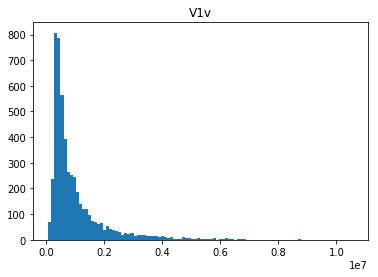

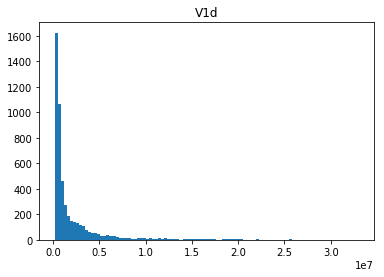

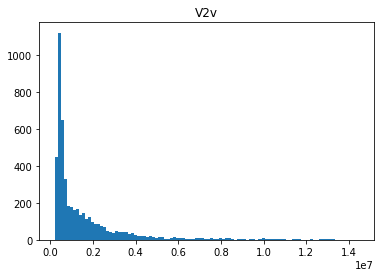

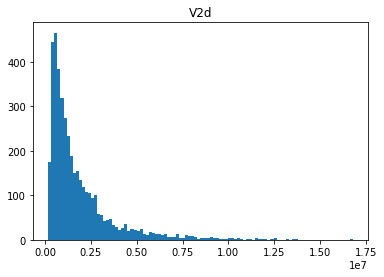

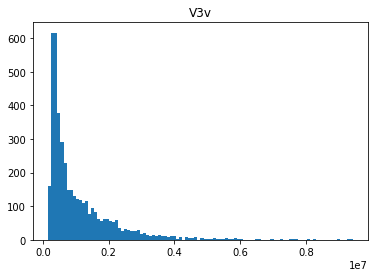

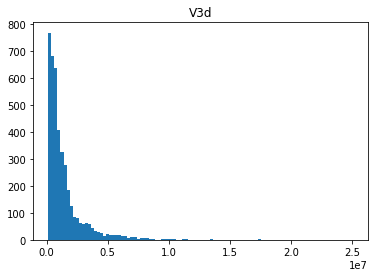

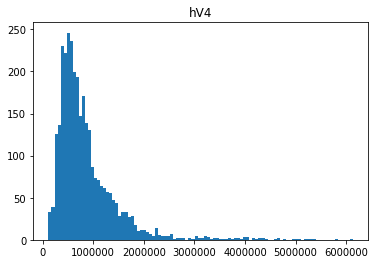

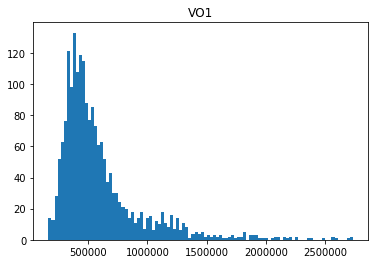

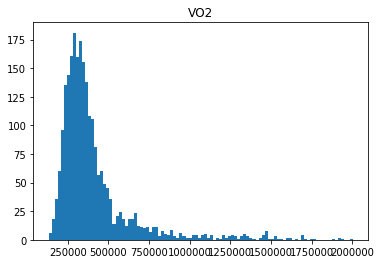

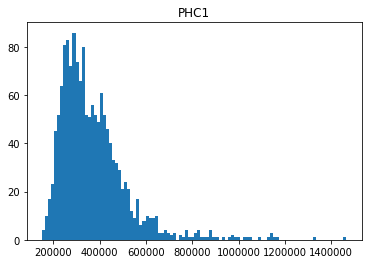

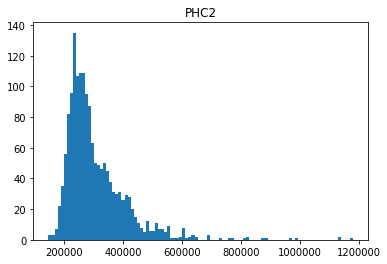

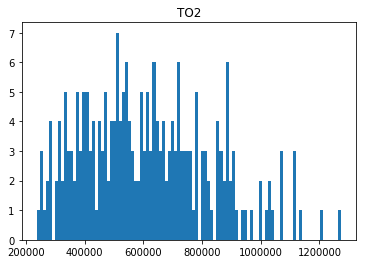

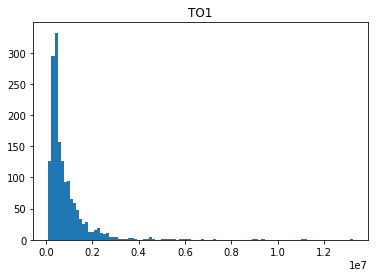

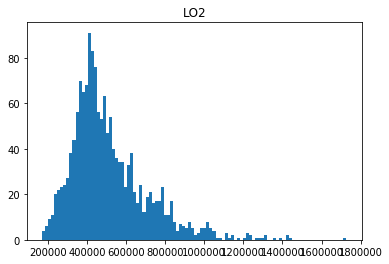

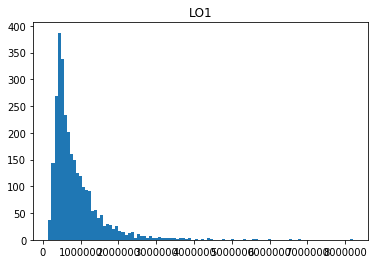

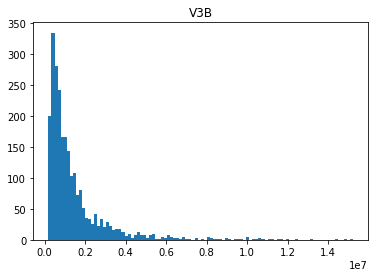

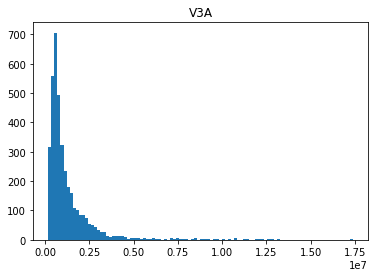

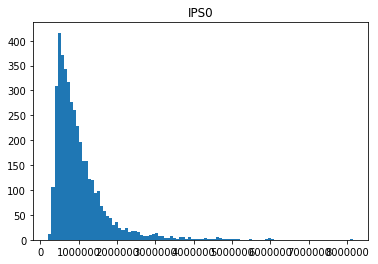

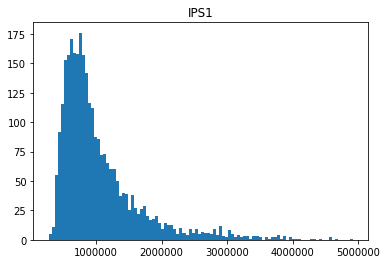

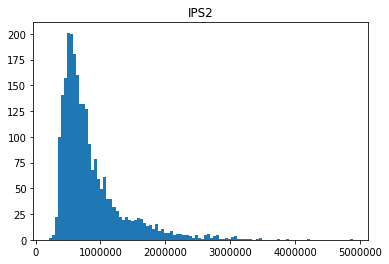

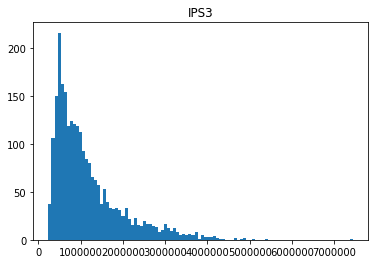

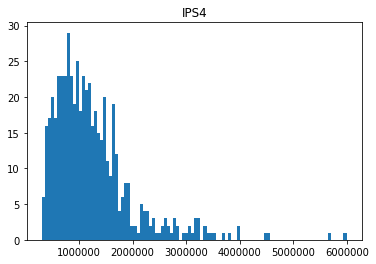

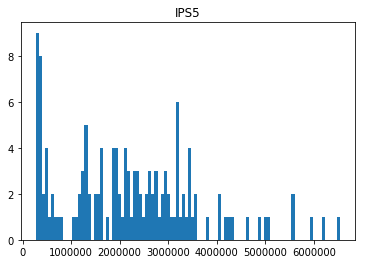

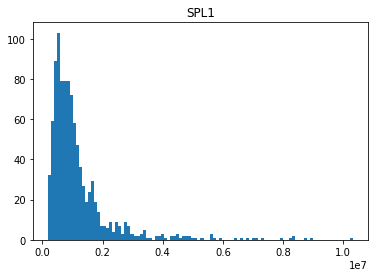

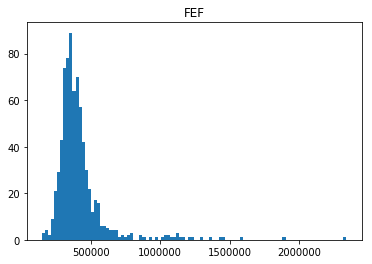

In [9]:
#plotting histograms of variance per ROI
tc_var_full = np.zeros(nonzerovar_mask.shape)
tc_var = timecourse.var(-1)
tc_var_full[nonzerovar_mask]= tc_var
for roi in idx:
    pl.figure()
    pl.title(roi)
    pl.hist(tc_var_full[idx[roi]],bins=100)
    pl.show()
    pl.close()

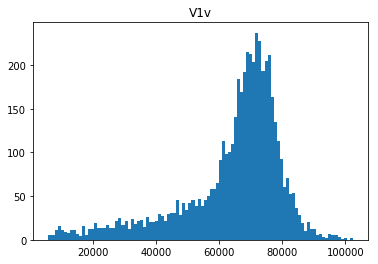

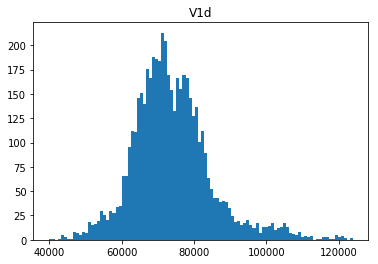

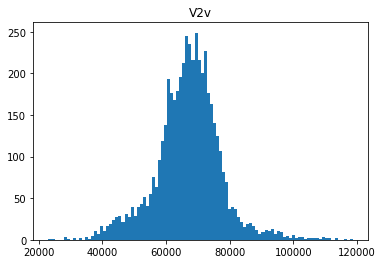

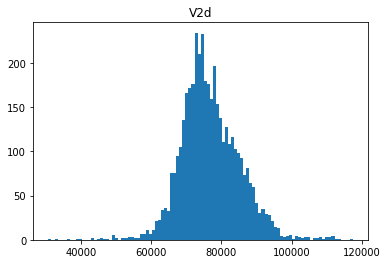

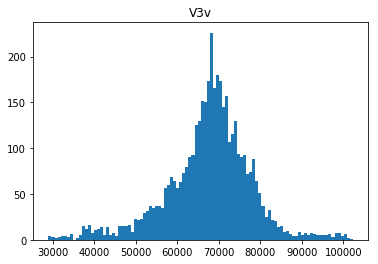

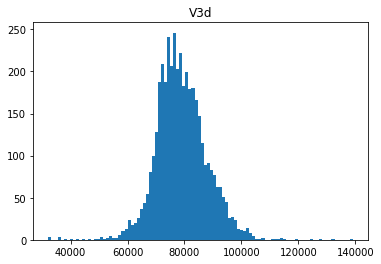

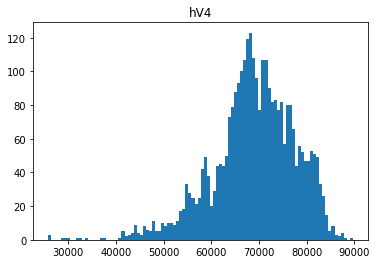

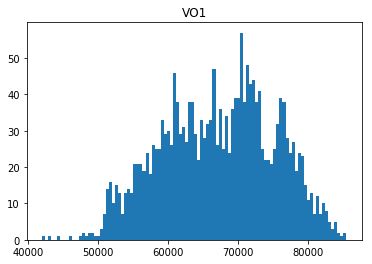

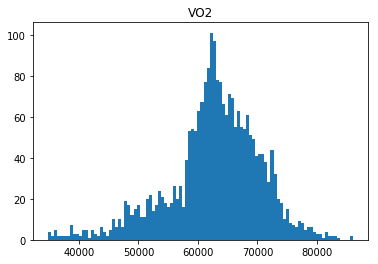

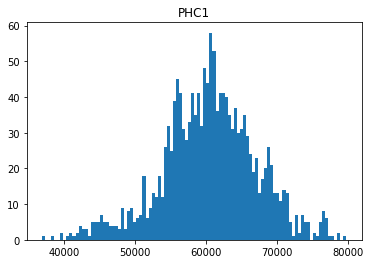

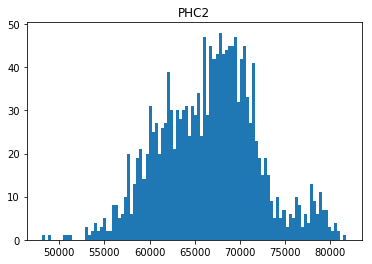

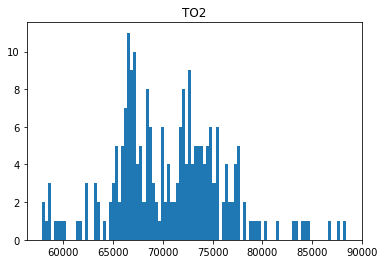

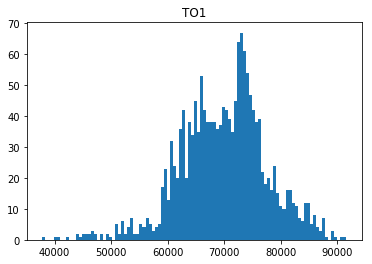

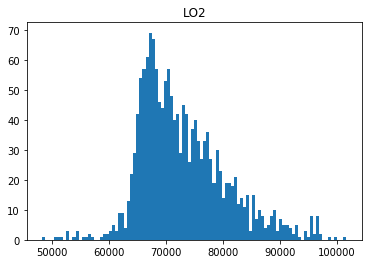

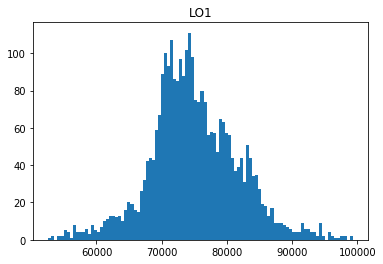

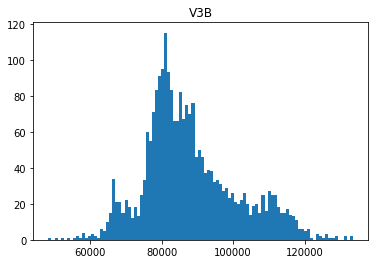

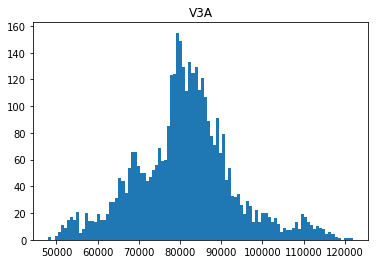

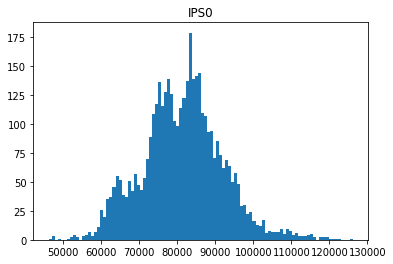

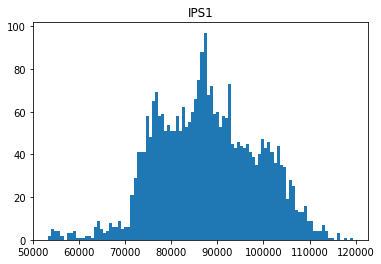

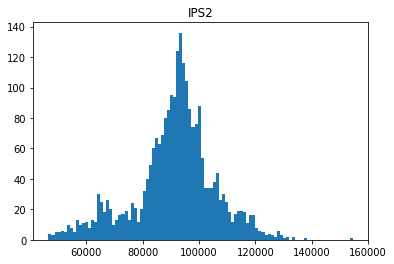

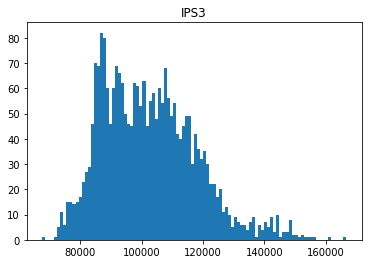

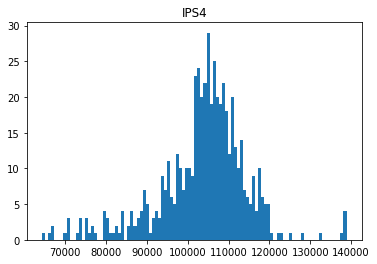

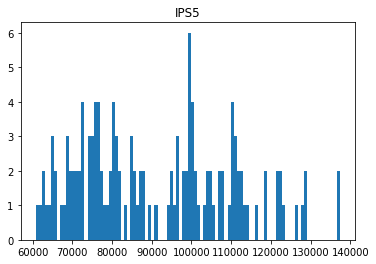

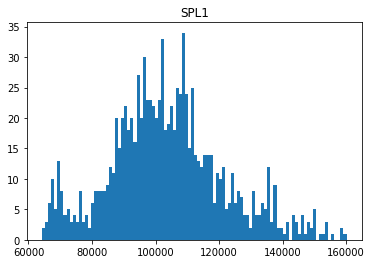

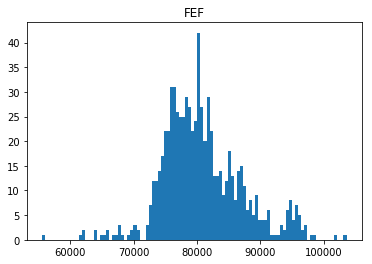

In [7]:
#plotting histograms of mean signal intensity per ROI
tc_mean_full = np.zeros(nonzerovar_mask.shape)
tc_mean = timecourse.mean(-1)
tc_mean_full[nonzerovar_mask]=tc_mean
for roi in idx:
    pl.figure()
    pl.title(roi)
    pl.hist(tc_mean_full[idx[roi]],bins=100)
    pl.show()
    pl.close()

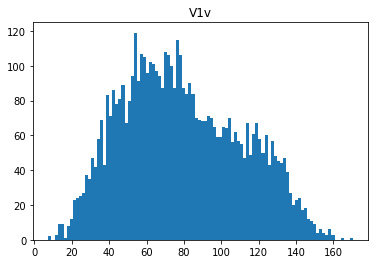

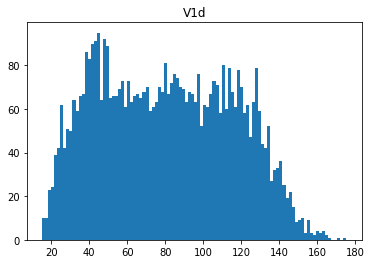

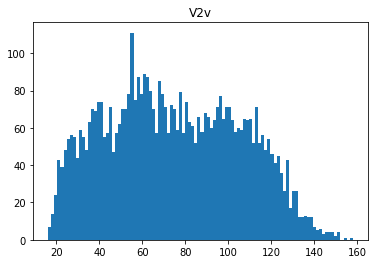

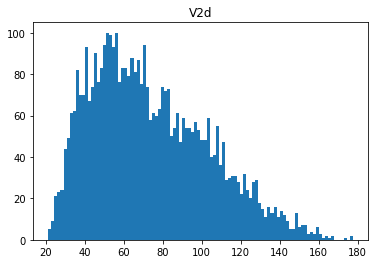

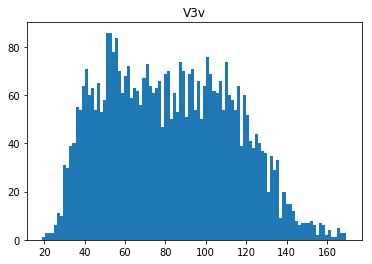

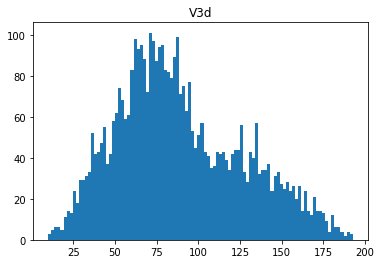

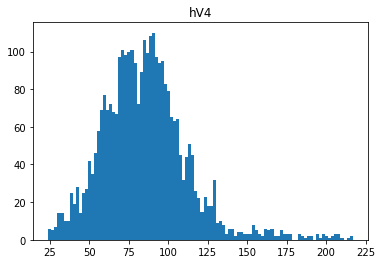

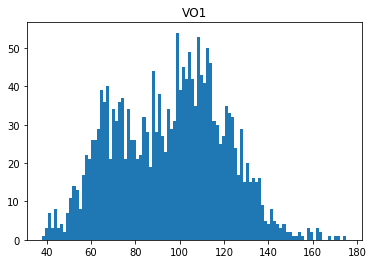

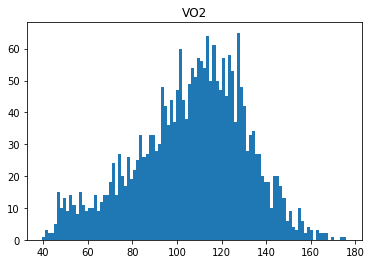

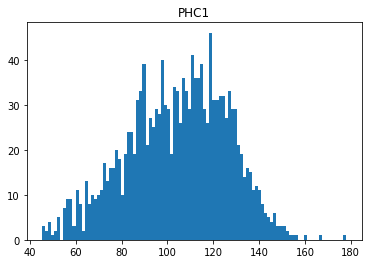

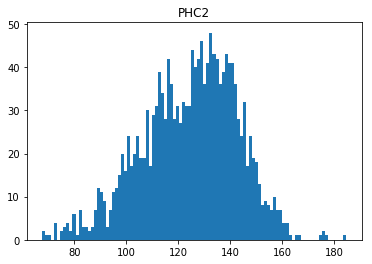

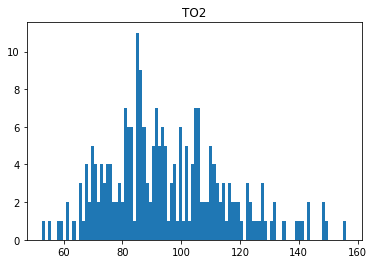

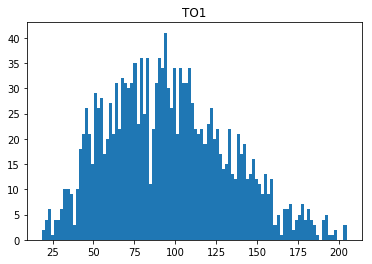

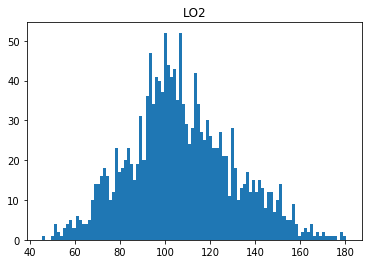

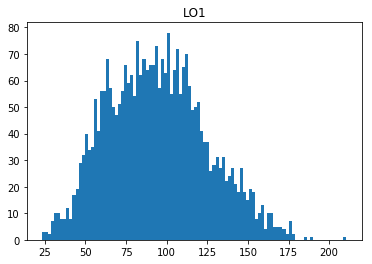

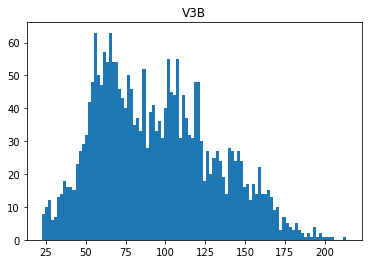

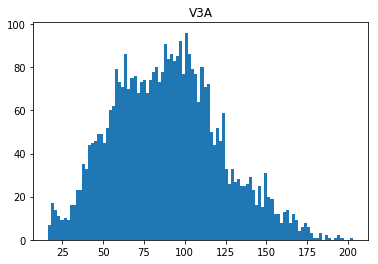

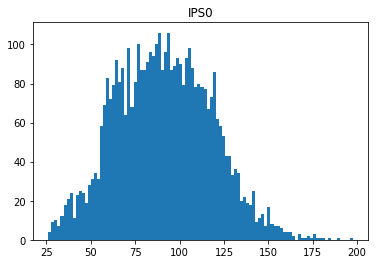

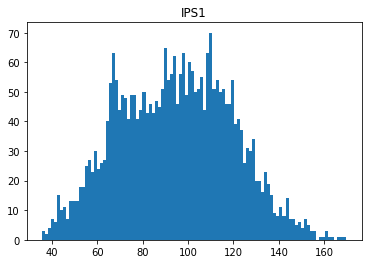

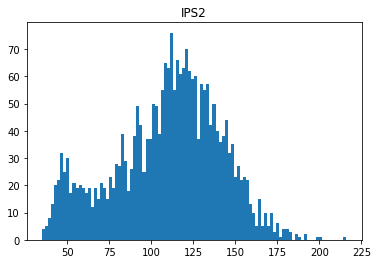

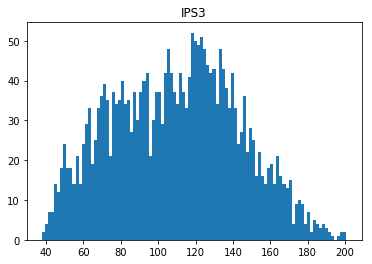

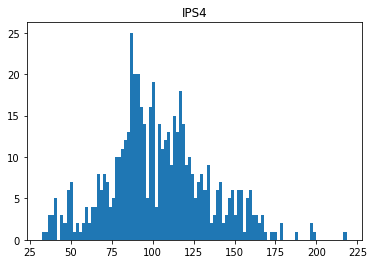

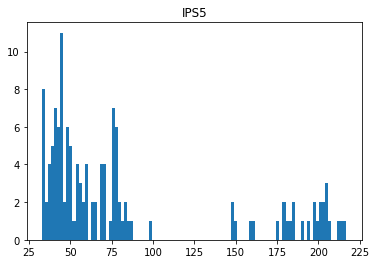

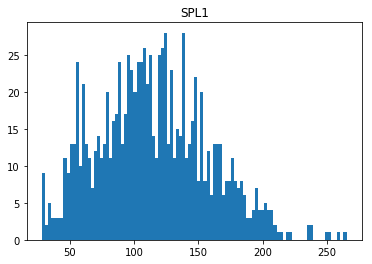

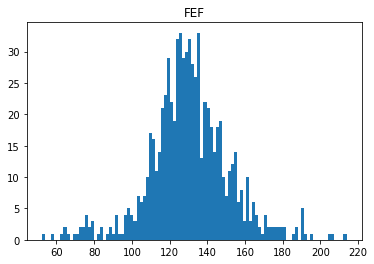

In [10]:
#plotting histograms of tSNR per ROI
tsnr_full = np.zeros(nonzerovar_mask.shape)
tsnr = tc_mean/np.sqrt(tc_var)
tsnr_full[nonzerovar_mask]=tsnr
for roi in idx:
    pl.figure()
    pl.title(roi)
    pl.hist(tsnr_full[idx[roi]],bins=100)
    pl.show()
    pl.close()

In [26]:
mean_ts_vert = cortex.Vertex2D(tc_mean_full, nonzerovar_mask, subject=subj, cmap='Jet_2D_alpha')
var_ts_vert = cortex.Vertex2D(tc_var_full, nonzerovar_mask, subject=subj, cmap='Jet_2D_alpha')
tsnr_vert = cortex.Vertex2D(tsnr_full, nonzerovar_mask, subject=subj, cmap='Jet_2D_alpha')

data_stats ={'mean':mean_ts_vert.raw, 'var':var_ts_vert.raw, 'tsnr':tsnr_vert.raw}

cortex.webgl.show(data_stats,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True,
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 18183


<JS: window.viewer>

Stopping server


In [56]:
#correcting for low variance TCs (below 0.25% signal change) (this is now included in prf_fit.py)
tc_mean = timecourse.mean(-1)
low_var = (timecourse - tc_mean[...,np.newaxis]).max(-1) < tc_mean*0.25/100

print("low var vertices: "+str(np.sum(low_var)))

gauss[low_var]=0
css_res[low_var]=0
dog_res[low_var]=0
norm_res[low_var]=0

low var vertices: 0


In [5]:
#RSQ
rsq = np.zeros((nonzerovar_mask.shape[0],4))
rsq[nonzerovar_mask,0] = gauss[:,-1]
rsq[nonzerovar_mask,1] = css_res[:, -1]
rsq[nonzerovar_mask,2] = dog_res[:, -1]
rsq[nonzerovar_mask,3] = norm_res[:, -1]

#prf ecc
ecc = np.zeros((nonzerovar_mask.shape[0],4))
ecc[nonzerovar_mask,0] = np.sqrt(gauss[:,0]**2+gauss[:,1]**2)
ecc[nonzerovar_mask,1] = np.sqrt(css_res[:,0]**2+css_res[:,1]**2)
ecc[nonzerovar_mask,2] = np.sqrt(dog_res[:,0]**2+dog_res[:,1]**2)
ecc[nonzerovar_mask,3] = np.sqrt(norm_res[:,0]**2+norm_res[:,1]**2)

#prf polar angle
polar = np.zeros((nonzerovar_mask.shape[0],4))
polar[nonzerovar_mask,0] = np.arctan2(gauss[:,1], gauss[:,0])
polar[nonzerovar_mask,1] = np.arctan2(css_res[:,1], css_res[:,0])
polar[nonzerovar_mask,2] = np.arctan2(dog_res[:,1], dog_res[:,0])
polar[nonzerovar_mask,3] = np.arctan2(norm_res[:,1], norm_res[:,0])

#prf size
size = np.zeros((nonzerovar_mask.shape[0],4))
size[nonzerovar_mask,0] = gauss[:,2]
size[nonzerovar_mask,1] = css_res[:,2]
size[nonzerovar_mask,2] = dog_res[:,2]
size[nonzerovar_mask,3] = norm_res[:,2]

#prf amplitude
amp = np.zeros((nonzerovar_mask.shape[0],4))
amp[nonzerovar_mask,0] = gauss[:,3]
amp[nonzerovar_mask,1] = css_res[:,3]
amp[nonzerovar_mask,2] = dog_res[:,3]
amp[nonzerovar_mask,3] = norm_res[:,3]

#BOLD baseline
bold_base = np.zeros((nonzerovar_mask.shape[0],4))
bold_base[nonzerovar_mask,0] = gauss[:,4]
bold_base[nonzerovar_mask,1] = css_res[:,4]
bold_base[nonzerovar_mask,2] = dog_res[:,4]
bold_base[nonzerovar_mask,3] = norm_res[:,4]

#other parameters plot on cortex

#css exponent
css_exp = np.zeros(nonzerovar_mask.shape[0])
css_exp[nonzerovar_mask] = css_res[:,5]

#surround amplitude
surr_amp = np.zeros((nonzerovar_mask.shape[0],2))
surr_amp[nonzerovar_mask,0] = dog_res[:,5]
surr_amp[nonzerovar_mask,1] = norm_res[:,5]

#surround size
surr_size = np.zeros((nonzerovar_mask.shape[0],2))
surr_size[nonzerovar_mask,0] = dog_res[:,6]
surr_size[nonzerovar_mask,1] = norm_res[:,6]

#suppression index (for norm also take into account baseline)
suppr_idx = np.zeros((nonzerovar_mask.shape[0],2))
suppr_idx[nonzerovar_mask,0] = (dog_res[:,5] * dog_res[:,6]**2)/(dog_res[:,3] * dog_res[:,2]**2)
suppr_idx[nonzerovar_mask,1] = (norm_res[:,5] * norm_res[:,6]**2 + norm_res[:,7])/(norm_res[:,3] * norm_res[:,2]**2 + norm_res[:,8])

#DOG width at minimum
dog_fwm = np.zeros(nonzerovar_mask.shape[0])
dog_fwm[nonzerovar_mask] = 2*np.sqrt(np.log((dog_res[:,5]*dog_res[:,2]**2)/(dog_res[:,3]* dog_res[:,6]**2))*(2*dog_res[:,2]**2*dog_res[:,6]**2)/(dog_res[:,2]**2-dog_res[:,6]**2))

#DOG width at zero
dog_fwz = np.zeros(nonzerovar_mask.shape[0])
dog_fwz[nonzerovar_mask] = 2*np.sqrt(2)*dog_res[:,2]*dog_res[:,6]*np.sqrt(-np.log(dog_res[:,2]/dog_res[:,5])/((dog_res[:,2]+dog_res[:,6])*(dog_res[:,2]-dog_res[:,6])))

#normalization model baselines (neural and surround)
baselines = np.zeros((nonzerovar_mask.shape[0],2))
baselines[nonzerovar_mask,0] = norm_res[:,7]
baselines[nonzerovar_mask,1] = norm_res[:,8]

/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel

In [8]:
alpha = rsq.max(-1) * (ecc.max(-1)<5)

alpha_gauss = rsq[:,0] * (ecc[:,0]<5)
alpha_css = rsq[:,1] * (ecc[:,1]<5)
alpha_dog = rsq[:,2] * (ecc[:,2]<5)
alpha_norm = rsq[:,3] * (ecc[:,3]<5)

In [11]:
#correcting for low intensity TCs (lowest xx percentile per ROI)
tc_mean_full = np.zeros(nonzerovar_mask.shape)
tc_mean = timecourse.mean(-1)
tc_mean_full[nonzerovar_mask]=tc_mean

for roi in idx:
    k_values = int(len(idx[roi])/20)
    lowest_intensity = np.argpartition(tc_mean_full[idx[roi]][tc_mean_full[idx[roi]]>0], k_values)
    alpha[idx[roi][tc_mean_full[idx[roi]]>0][lowest_intensity[:k_values]]] = 0
    
    tc_mean_full[idx[roi][tc_mean_full[idx[roi]]>0][lowest_intensity[:k_values]]] = 0

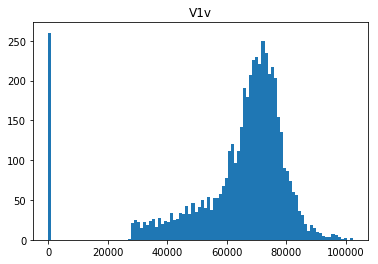

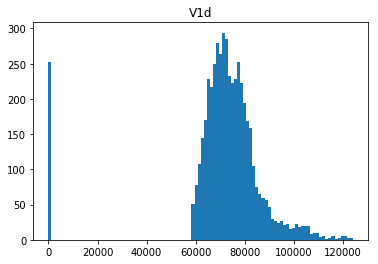

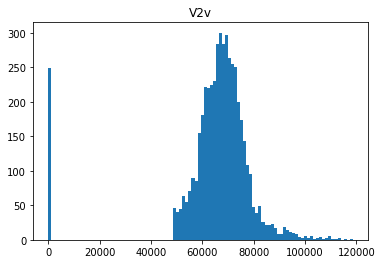

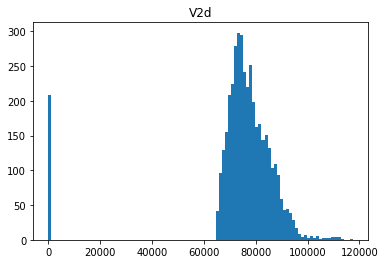

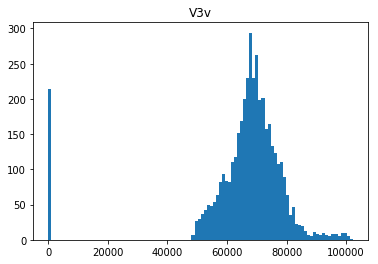

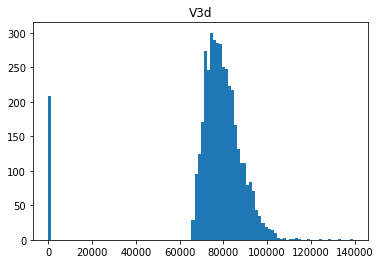

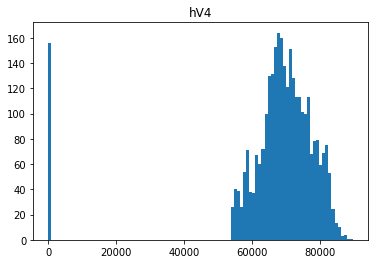

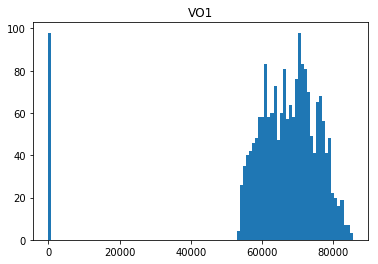

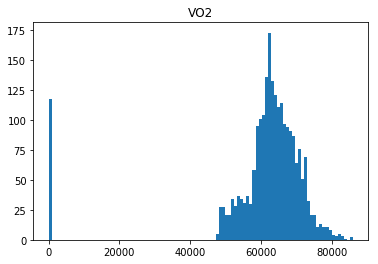

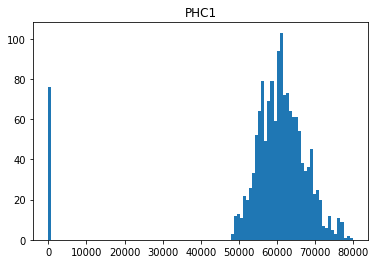

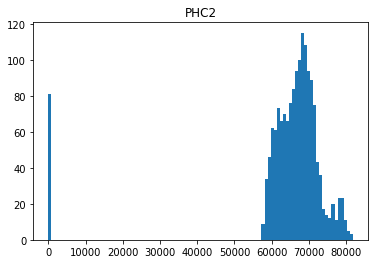

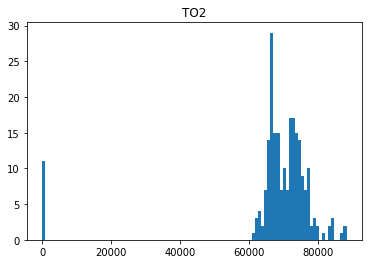

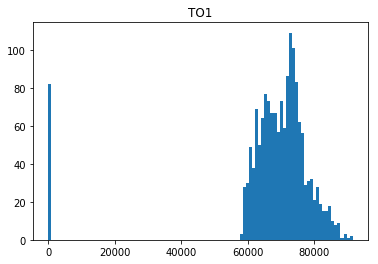

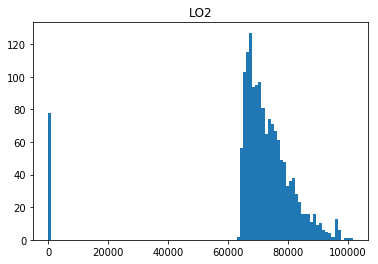

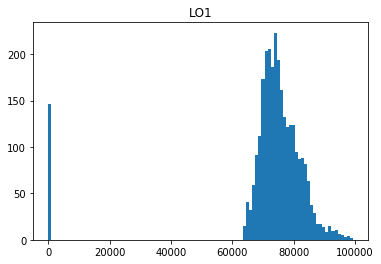

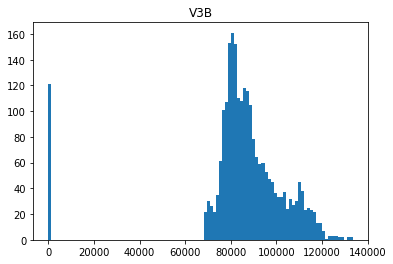

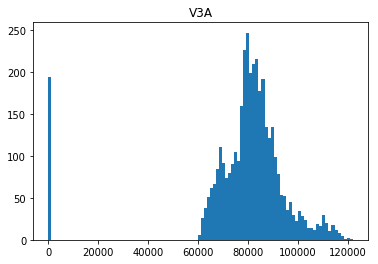

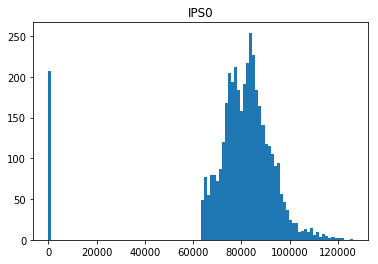

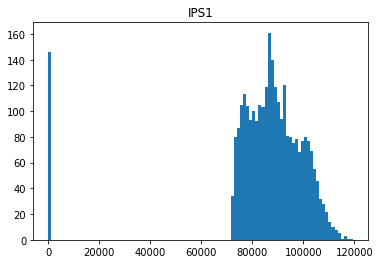

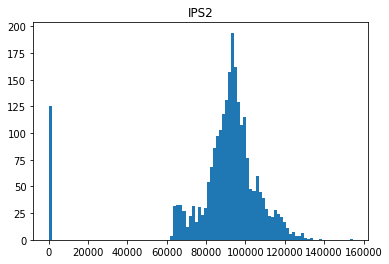

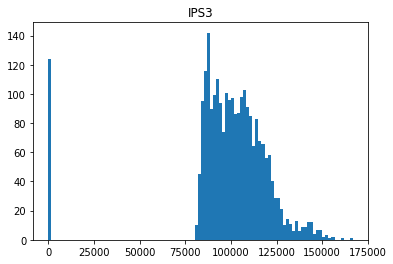

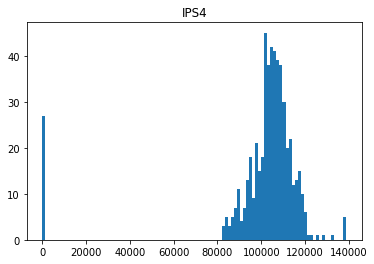

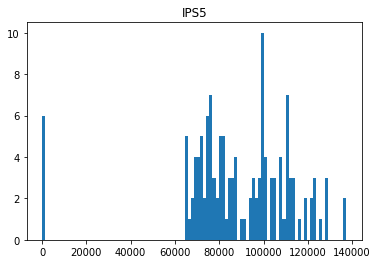

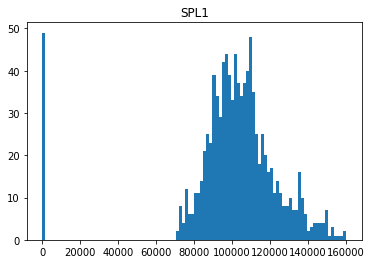

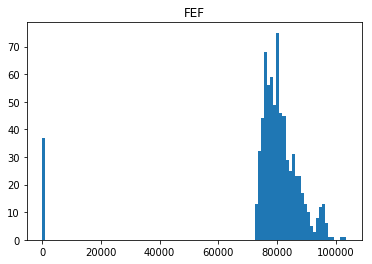

In [12]:
#plotting histograms of mean signal intensity per ROI, after removing lowest intensity
for roi in idx:
    pl.figure()
    pl.title(roi)
    pl.hist(tc_mean_full[idx[roi]],bins=100)
    pl.show()
    #pl.close()

In [13]:
#use e.g. roi_mask(V1,alpha) or roi_mask(idx["FEF"],alpha) as dim2 to plot only for specific ROIs

rsq_diff_cssgauss = cortex.Vertex2D(rsq[:,1]-rsq[:,0], alpha, subject=subj,
                                              vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

rsq_diff_doggauss = cortex.Vertex2D(rsq[:,2]-rsq[:,0], alpha, subject=subj,
                                          vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

rsq_diff_normgauss = cortex.Vertex2D(rsq[:,3]-rsq[:,0], alpha, subject=subj,
                                          vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

rsq_diff_normdog = cortex.Vertex2D(rsq[:,3]-rsq[:,2], alpha, subject=subj,
                                          vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

rsq_diff_normcss = cortex.Vertex2D(rsq[:,3]-rsq[:,1], alpha, subject=subj, 
                                          vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

#NOTE: MULTIPLE VERTEX2D IN ONE DATASET = BUGGY
ds_rsq = {'CSS - Gauss':rsq_diff_cssgauss.raw, 'DoG -  Gauss':rsq_diff_doggauss.raw, 'Norm - Gauss':rsq_diff_normgauss.raw,
    'Norm - DoG':rsq_diff_normdog.raw, 'Norm - CSS':rsq_diff_normcss.raw}

cortex.webgl.show(ds_rsq,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True,
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 34269


<JS: window.viewer>

Stopping server


In [164]:
#plot ecc on cortex
ecc_gauss = cortex.Vertex2D(ecc[:,0], alpha, subject=subj, vmin=0, vmax=5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
ecc_css = cortex.Vertex2D(ecc[:,1], alpha, subject=subj, vmin=0, vmax=5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
ecc_dog = cortex.Vertex2D(ecc[:,2], alpha, subject=subj, vmin=0, vmax=5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
ecc_norm = cortex.Vertex2D(ecc[:,3], alpha, subject=subj, vmin=0, vmax=5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_ecc = {'Ecc Gauss':ecc_gauss.raw, 'Ecc CSS':ecc_css.raw, 'Ecc DoG':ecc_dog.raw, 'Ecc Norm':ecc_norm.raw}

cortex.webgl.show(ds_ecc,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 41565


<JS: window.viewer>

Stopping server


In [21]:
#plot polar angle on cortex
alpha_roi = roi_mask(V2,alpha)
polar_gauss = cortex.Vertex2D(polar[:,0], alpha_roi, subject=subj, vmin2=0.2, vmax2=0.6, cmap='Retinotopy_HSV_2x_alpha')
polar_css = cortex.Vertex2D(polar[:,1], alpha_roi, subject=subj, vmin2=0.2, vmax2=0.6, cmap='Retinotopy_HSV_2x_alpha')
polar_dog = cortex.Vertex2D(polar[:,2], alpha_roi, subject=subj, vmin2=0.2, vmax2=0.6, cmap='Retinotopy_HSV_2x_alpha')
polar_norm = cortex.Vertex2D(polar[:,3], alpha_roi, subject=subj, vmin2=0.2, vmax2=0.6, cmap='Retinotopy_HSV_2x_alpha')

polar_norm_full = cortex.Vertex2D(polar[:,3], alpha, subject=subj, vmin2=0.2, vmax2=0.6, cmap='Retinotopy_HSV_2x_alpha')


ds_polar = {'polar Gauss':polar_gauss.raw, 'polar CSS':polar_css.raw, 'polar DoG':polar_dog.raw, 'polar Norm':polar_norm.raw,
           'polar norm full':polar_norm_full.raw}

cortex.webgl.show(ds_polar,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 50418


<JS: window.viewer>

Stopping server


In [166]:
#plot size on cortex
size_gauss = cortex.Vertex2D(size[:,0], alpha, subject=subj, vmin=0, vmax=3, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
size_css = cortex.Vertex2D(size[:,1], alpha, subject=subj, vmin=0, vmax=3, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
size_dog = cortex.Vertex2D(size[:,2], alpha, subject=subj, vmin=0, vmax=3, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
size_norm = cortex.Vertex2D(size[:,3], alpha, subject=subj, vmin=0, vmax=3, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_size = {'size Gauss':size_gauss.raw, 'size CSS':size_css.raw, 'size DoG':size_dog.raw, 'size Norm':size_norm.raw}

cortex.webgl.show(ds_size,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 13337


<JS: window.viewer>

Stopping server


In [12]:
#plot amp on cortex
amp_gauss = cortex.Vertex2D(amp[:,0], alpha, subject=subj, vmin=0, vmax=10, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
amp_css = cortex.Vertex2D(amp[:,1], alpha, subject=subj, vmin=0, vmax=10, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
amp_dog = cortex.Vertex2D(amp[:,2], alpha, subject=subj, vmin=0, vmax=10, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
amp_norm = cortex.Vertex2D(amp[:,3], alpha, subject=subj, vmin=0, vmax=10, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_amp = {'amp Gauss':amp_gauss.raw, 
          'amp CSS':amp_css.raw, 
          'amp DoG':amp_dog.raw, 
          'amp Norm':amp_norm.raw}

cortex.webgl.show(ds_amp,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 43998


<JS: window.viewer>

Stopping server


In [26]:
msk = ((amp[alpha>0.4,0] > 0) & (amp[alpha>0.4,3]<0))

In [29]:
amp[alpha>0.4][msk]

array([[   5.4640963 ,  867.52605208,  279.52846208,  -21.19084234],
       [   9.04414356, 2396.6251633 , 1167.04602256, -672.85118286]])

In [159]:
#CSS exponent
ds_css_exp = {'CSS Exponent':cortex.Vertex2D(css_exp, alpha_css, subject=subj,
                                             vmin=0, vmax=0.75, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha').raw}

cortex.webgl.show(ds_css_exp,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)


Started server on port 44197


<JS: window.viewer>

Stopping server


In [167]:
#plot surr_size on cortex
surr_size_dog = cortex.Vertex2D(surr_size[:,0], alpha_dog, subject=subj,
                                vmax=50, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
surr_size_norm = cortex.Vertex2D(surr_size[:,1], alpha_norm, subject=subj,
                                  vmax=50, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_surr_size = {'surr_size DoG':surr_size_dog.raw, 'surr_size Norm':surr_size_norm.raw}

cortex.webgl.show(ds_surr_size,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 29199


<JS: window.viewer>

Stopping server


In [168]:
#dog fwmin, fwzero
fwm_dog = cortex.Vertex2D(dog_fwm, alpha_dog, subject=subj,
                                vmin=1, vmax=20, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
fwz_dog = cortex.Vertex2D(dog_fwz, alpha_dog, subject=subj,
                                 vmin=0, vmax=5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

dog_measures = {'DoG full width at min':fwm_dog.raw, ' DoG full width at zero':fwz_dog.raw}

cortex.webgl.show(dog_measures,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 16609


<JS: window.viewer>

Stopping server


In [169]:
#plot suppr idx on cortex (not very meaningful)
suppr_idx_dog = cortex.Vertex2D(suppr_idx[:,0], alpha_dog, subject=subj,
                                vmin=0.1, vmax=10, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
suppr_idx_norm = cortex.Vertex2D(suppr_idx[:,1], alpha_norm, subject=subj,
                                 vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_suppr_idx = {'suppr_idx DoG':suppr_idx_dog.raw, 'suppr_idx Norm':suppr_idx_norm.raw}

cortex.webgl.show(ds_suppr_idx,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 60544


<JS: window.viewer>

Stopping server


In [9]:
#norm baselines
neural_baseline = cortex.Vertex2D(baselines[:,0], alpha_norm, subject=subj,
                                vmin=-2, vmax=2, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
surr_baseline = cortex.Vertex2D(baselines[:,1], alpha_norm, subject=subj,
                                 vmin=0, vmax=150, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_baselines = {'Neural baseline':neural_baseline.raw, 'Surround baseline':surr_baseline.raw}


cortex.webgl.show(ds_baselines,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 15323


<JS: window.viewer>

Stopping server
Stopping server


In [172]:
%matplotlib notebook
#use e.g. roi_mask(V1,alpha_gauss).astype('bool') instead of just V1 to implement same alpha masking as cortex plots
pl.figure()
pl.title("V1")
pl.xlabel("Eccentricity (degrees)")
pl.ylabel("Size (degrees)")
ecc_gauss_V1 = ecc_gauss.dim1.data[roi_mask(V1,alpha*(amp[:,0]>0)).astype('bool')]
ecc_css_V1 = ecc_css.dim1.data[roi_mask(V1,alpha*(amp[:,1]>0)).astype('bool')]
ecc_dog_V1 = ecc_dog.dim1.data[roi_mask(V1,alpha*(amp[:,2]>0)).astype('bool')]
ecc_norm_V1 = ecc_norm.dim1.data[roi_mask(V1,alpha*(amp[:,3]>0)).astype('bool')]
size_gauss_V1 = size_gauss.dim1.data[roi_mask(V1,alpha*(amp[:,0]>0)).astype('bool')]
size_css_V1 = size_css.dim1.data[roi_mask(V1,alpha*(amp[:,1]>0)).astype('bool')]
size_dog_V1 = size_dog.dim1.data[roi_mask(V1,alpha*(amp[:,1]>0)).astype('bool')]
size_norm_V1 = size_norm.dim1.data[roi_mask(V1,alpha*(amp[:,1]>0)).astype('bool')]

pl.scatter(ecc_gauss_V1, size_gauss_V1, s=1)
pl.scatter(ecc_css_V1, size_css_V1, s=1)
pl.scatter(ecc_dog_V1, size_dog_V1, s=1)
pl.scatter(ecc_norm_V1, size_norm_V1, s=1)

pl.plot(np.unique(ecc_gauss_V1, np.poly1d(np.polyfit(ecc_gauss.dim1.data[roi_mask(V1,alpha_gauss*(amp[:,0]>0)).astype('bool')], size_gauss.dim1.data[roi_mask(V1,alpha_gauss*(amp[:,0]>0)).astype('bool')], 1))(np.unique(ecc_gauss_V1), label='gauss')
pl.plot(np.unique(ecc_css.dim1.data[roi_mask(V1,alpha_css*(amp[:,1]>0)).astype('bool')]), np.poly1d(np.polyfit(ecc_css.dim1.data[roi_mask(V1,alpha_css*(amp[:,1]>0)).astype('bool')], size_css.dim1.data[roi_mask(V1,alpha_css*(amp[:,1]>0)).astype('bool')], 1))(np.unique(ecc_css.dim1.data[roi_mask(V1,alpha_css*(amp[:,1]>0)).astype('bool')])), label='css')
pl.plot(np.unique(ecc_dog.dim1.data[roi_mask(V1,alpha_dog*(amp[:,2]>0)).astype('bool')]), np.poly1d(np.polyfit(ecc_dog.dim1.data[roi_mask(V1,alpha_dog*(amp[:,2]>0)).astype('bool')], size_dog.dim1.data[roi_mask(V1,alpha_dog*(amp[:,2]>0)).astype('bool')], 1))(np.unique(ecc_dog.dim1.data[roi_mask(V1,alpha_dog*(amp[:,2]>0)).astype('bool')])), label='dog')
pl.plot(np.unique(ecc_norm.dim1.data[roi_mask(V1,alpha_norm*(amp[:,3]>0)).astype('bool')]), np.poly1d(np.polyfit(ecc_norm.dim1.data[roi_mask(V1,alpha_norm*(amp[:,3]>0)).astype('bool')], size_norm.dim1.data[roi_mask(V1,alpha_norm*(amp[:,3]>0)).astype('bool')], 1))(np.unique(ecc_norm.dim1.data[roi_mask(V1,alpha_norm*(amp[:,3]>0)).astype('bool')])), label='norm')
pl.legend()
pl.figure()
pl.title("V2")
pl.xlabel("Eccentricity (degrees)")
pl.ylabel("Size (degrees)")
pl.scatter(ecc_gauss.dim1.data[V2], size_gauss.dim1.data[V2], s=1)
pl.scatter(ecc_css.dim1.data[V2], size_css.dim1.data[V2], s=1)
pl.scatter(ecc_dog.dim1.data[V2], size_dog.dim1.data[V2], s=1)
pl.scatter(ecc_norm.dim1.data[V2], size_norm.dim1.data[V2], s=1)
pl.plot(np.unique(ecc_gauss.dim1.data[V2]), np.poly1d(np.polyfit(ecc_gauss.dim1.data[V2], size_gauss.dim1.data[V2], 1))(np.unique(ecc_gauss.dim1.data[V2])), label='gauss')
pl.plot(np.unique(ecc_css.dim1.data[V2]), np.poly1d(np.polyfit(ecc_css.dim1.data[V2], size_css.dim1.data[V2], 1))(np.unique(ecc_css.dim1.data[V2])), label='css')
pl.plot(np.unique(ecc_dog.dim1.data[V2]), np.poly1d(np.polyfit(ecc_dog.dim1.data[V2], size_dog.dim1.data[V2], 1))(np.unique(ecc_dog.dim1.data[V2])), label='dog')
pl.plot(np.unique(ecc_norm.dim1.data[V2]), np.poly1d(np.polyfit(ecc_norm.dim1.data[V2], size_norm.dim1.data[V2], 1))(np.unique(ecc_norm.dim1.data[V2])), label='norm')
pl.legend()
pl.figure()
pl.title("V3")
pl.xlabel("Eccentricity (degrees)")
pl.ylabel("Size (degrees)")
pl.scatter(ecc_gauss.dim1.data[V3], size_gauss.dim1.data[V3], s=1)
pl.scatter(ecc_css.dim1.data[V3], size_css.dim1.data[V3], s=1)
pl.scatter(ecc_dog.dim1.data[V3], size_dog.dim1.data[V3], s=1)
pl.scatter(ecc_norm.dim1.data[V3], size_norm.dim1.data[V3], s=1)
pl.plot(np.unique(ecc_gauss.dim1.data[V3]), np.poly1d(np.polyfit(ecc_gauss.dim1.data[V3], size_gauss.dim1.data[V3], 1))(np.unique(ecc_gauss.dim1.data[V3])), label='gauss')
pl.plot(np.unique(ecc_css.dim1.data[V3]), np.poly1d(np.polyfit(ecc_css.dim1.data[V3], size_css.dim1.data[V3], 1))(np.unique(ecc_css.dim1.data[V3])), label='css')
pl.plot(np.unique(ecc_dog.dim1.data[V3]), np.poly1d(np.polyfit(ecc_dog.dim1.data[V3], size_dog.dim1.data[V3], 1))(np.unique(ecc_dog.dim1.data[V3])), label='dog')
pl.plot(np.unique(ecc_norm.dim1.data[V3]), np.poly1d(np.polyfit(ecc_norm.dim1.data[V3], size_norm.dim1.data[V3], 1))(np.unique(ecc_norm.dim1.data[V3])), label='norm')
pl.legend()

SyntaxError: invalid syntax (<ipython-input-172-1f93f9515c60>, line 21)

<IPython.core.display.Javascript object>


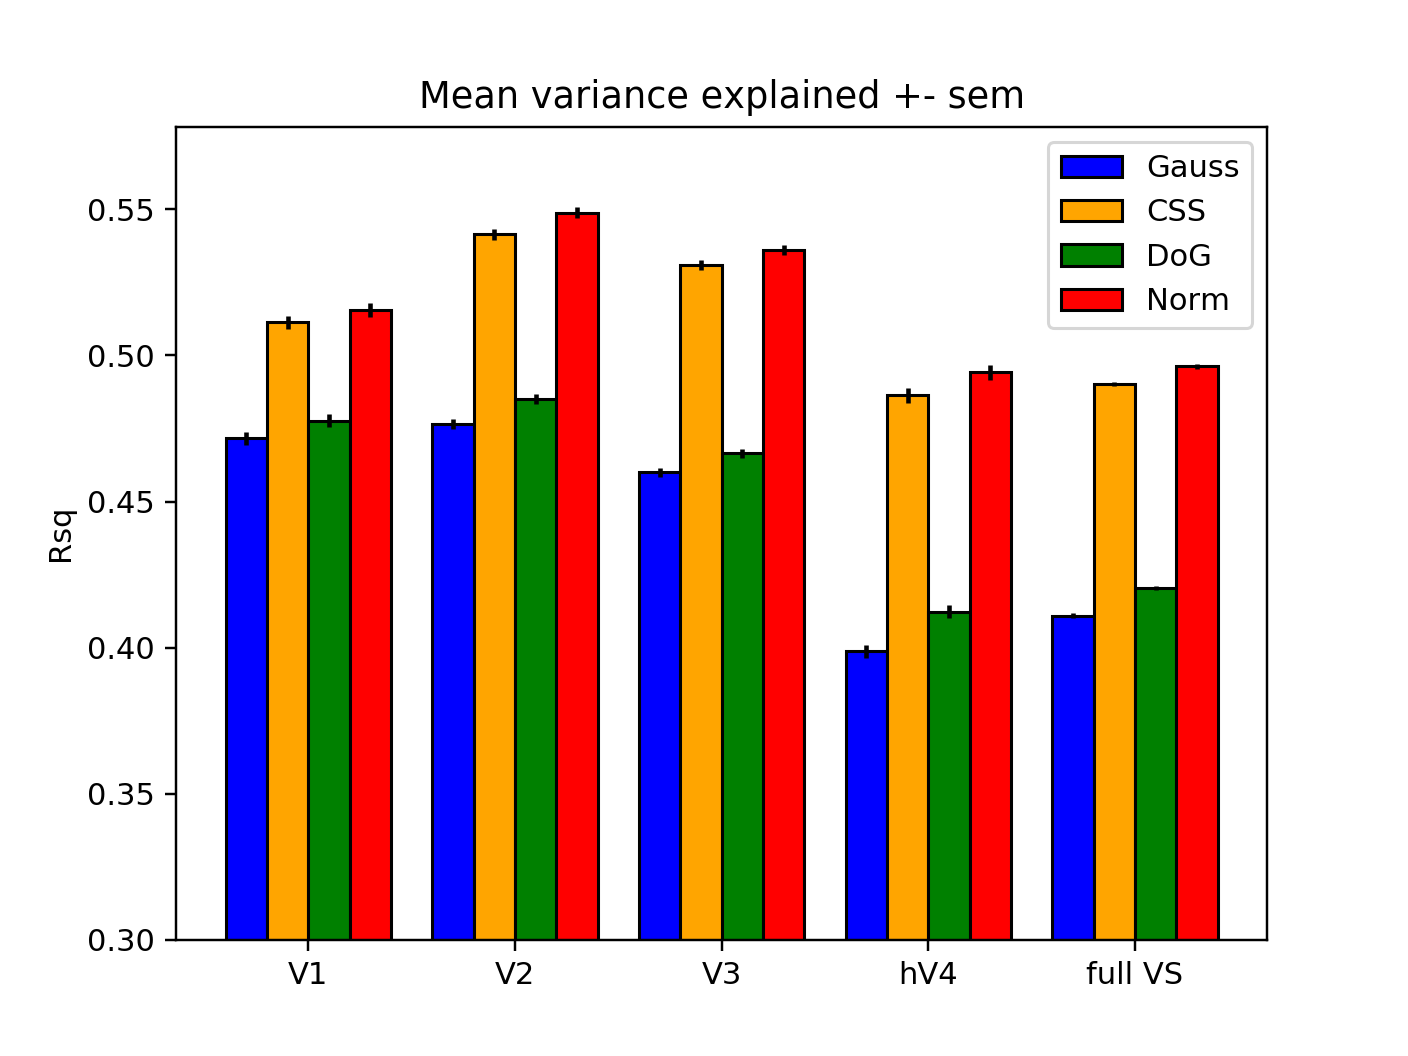

In [34]:
%matplotlib notebook

rsq_thresh = 0.3

["V1v", "V1d", "V2v", "V2d", "V3v", "V3d", "hV4", "VO1", "VO2", "PHC1", "PHC2",
    "TO2", "TO1", "LO2", "LO1", "V3B", "V3A", "IPS0", "IPS1", "IPS2", "IPS3", "IPS4", 
    "IPS5", "SPL1", "FEF"]
pl.figure()
pl.title("Mean variance explained +- sem")
pl.ylabel("Rsq")
p1=pl.bar([0,0.1,0.2,0.3], height=np.mean(rsq[roi_mask(V1,alpha)>rsq_thresh],axis=0), width=0.1, yerr=sem(rsq[roi_mask(V1,alpha)>rsq_thresh],axis=0), color=
      ['blue','orange','green','red'],edgecolor='black')

pl.bar([0.5,0.6,0.7,0.8], height=np.mean(rsq[roi_mask(V2,alpha)>rsq_thresh],axis=0), width=0.1, yerr=sem(rsq[roi_mask(V2,alpha)>rsq_thresh],axis=0), color=
      ['blue','orange','green','red'],edgecolor='black')

pl.bar([1,1.1,1.2,1.3], height=np.mean(rsq[roi_mask(V3,alpha)>rsq_thresh],axis=0), width=0.1, yerr=sem(rsq[roi_mask(V3,alpha)>rsq_thresh],axis=0), color=
      ['blue','orange','green','red'],edgecolor='black')

pl.bar([1.5,1.6,1.7,1.8], height=np.mean(rsq[roi_mask(idx['hV4'],alpha)>rsq_thresh],axis=0), width=0.1,yerr=sem(rsq[roi_mask(idx['hV4'],alpha)>rsq_thresh],axis=0), color=
      ['blue','orange','green','red'],edgecolor='black')

pl.bar([2.0,2.1,2.2,2.3], height=np.mean(rsq[roi_mask(visual_system,alpha)>rsq_thresh],axis=0), width=0.1,yerr=sem(rsq[roi_mask(visual_system,alpha)>rsq_thresh],axis=0), color=
      ['blue','orange','green','red'],edgecolor='black')

pl.xticks([0.15, 0.65, 1.15, 1.65, 2.15], ['V1','V2', 'V3', 'hV4', 'full VS'])

pl.ylim(bottom=0.3)
pl.legend((p1[0],p1[1],p1[2],p1[3]),('Gauss','CSS','DoG','Norm'),loc=0)


In [33]:

for roi in idx:
    print(roi)
    try:
        print(ks_2samp(rsq[roi_mask(idx[roi],alpha)>rsq_thresh,1],rsq[roi_mask(idx[roi],alpha)>rsq_thresh,3]))
    except:
        print()


print("full visual system")
print(ks_2samp(rsq[roi_mask(visual_system,alpha)>rsq_thresh,1],rsq[roi_mask(visual_system,alpha)>rsq_thresh,3]))

V1v
Ks_2sampResult(statistic=0.026407227241139697, pvalue=0.6918289550897199)
V1d
Ks_2sampResult(statistic=0.018968583283935914, pvalue=0.9195113691567358)
V2v
Ks_2sampResult(statistic=0.04297520661157028, pvalue=0.02219293762567435)
V2d
Ks_2sampResult(statistic=0.026362038664323406, pvalue=0.5879240814015391)
V3v
Ks_2sampResult(statistic=0.03400503778337538, pvalue=0.31249237409485386)
V3d
Ks_2sampResult(statistic=0.01986475063398141, pvalue=0.7349053665990534)
hV4
Ks_2sampResult(statistic=0.03874813710879285, pvalue=0.09509438846639724)
VO1
Ks_2sampResult(statistic=0.04825737265415549, pvalue=0.7680956169309832)
VO2
Ks_2sampResult(statistic=0.375, pvalue=0.5189424992880709)
PHC1

PHC2

TO2
Ks_2sampResult(statistic=0.07407407407407407, pvalue=0.9999981387440223)
TO1
Ks_2sampResult(statistic=0.043333333333333335, pvalue=0.9358933482164876)
LO2
Ks_2sampResult(statistic=0.23076923076923078, pvalue=0.8281047289146033)
LO1
Ks_2sampResult(statistic=0.015526443474041751, pvalue=0.96372930839

In [62]:
idx['V1d'].max()

1240160

In [ ]:
######################################################################################

In [ ]:
#the following cells are in case we want to quickly look at some specific model/data timecourse

In [11]:
analysis_settings = '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/analysis_settings_cartesius.yml'

local_files = '/Users/marcoaqil/prfpy_norm/analysis_settings.yml'

with open(analysis_settings) as f:
    analysis_info = yaml.safe_load(f)

with open(local_files) as f:
    analysis_info_local = yaml.safe_load(f)
# note that screenshot paths and task names should be in the same order
n_pix = analysis_info["n_pix"]
discard_volumes = analysis_info["discard_volumes"]
screenshot_paths = analysis_info_local["screenshot_paths"]
screen_size_cm = analysis_info["screen_size_cm"]
screen_distance_cm = analysis_info["screen_distance_cm"]
TR = analysis_info["TR"]
task_names = analysis_info["task_names"]
data_path = analysis_info["data_path"]
fitting_space = analysis_info["fitting_space"]
window_length = analysis_info["window_length"]
n_jobs = analysis_info["n_jobs"]
hrf = analysis_info["hrf"]
gradient_method = analysis_info["gradient_method"]
verbose = analysis_info["verbose"]
rsq_threshold = analysis_info["rsq_threshold"]
n_batches = analysis_info["n_batches"]
fit_hrf = analysis_info["fit_hrf"]

#new params to be added to analysis settings
dm_edges_clipping = analysis_info["dm_edges_clipping"]
baseline_volumes_begin_end = analysis_info["baseline_volumes_begin_end"]
min_percent_var = analysis_info["min_percent_var"]

In [12]:
#create stim
task_lengths, prf_stim, late_iso_dict = create_full_stim(screenshot_paths,
                n_pix,
                discard_volumes,
                baseline_volumes_begin_end,                                         
                dm_edges_clipping,
                screen_size_cm,
                screen_distance_cm,
                TR,
                task_names)

Design matrix completed
Design matrix completed
Design matrix completed
Design matrix completed
Design matrix completed


In [13]:
#initialize models 
gg = Iso2DGaussianGridder(stimulus=prf_stim,
                          hrf=hrf,
                          filter_predictions=True,
                          window_length=window_length,
                          task_lengths=task_lengths)

gg_css = CSS_Iso2DGaussianGridder(stimulus=prf_stim,
                          hrf=hrf,
                          filter_predictions=True,
                          window_length=window_length,
                                  task_lengths=task_lengths)

gg_norm = Norm_Iso2DGaussianGridder(stimulus=prf_stim,
                                    hrf=hrf,
                                    filter_predictions=True,
                                    window_length=window_length,
                                    task_lengths=task_lengths)

gg_dog = DoG_Iso2DGaussianGridder(stimulus=prf_stim,
                                  hrf=hrf,
                                  filter_predictions=True,
                                  window_length=window_length,
                                  task_lengths=task_lengths)

<IPython.core.display.Javascript object>


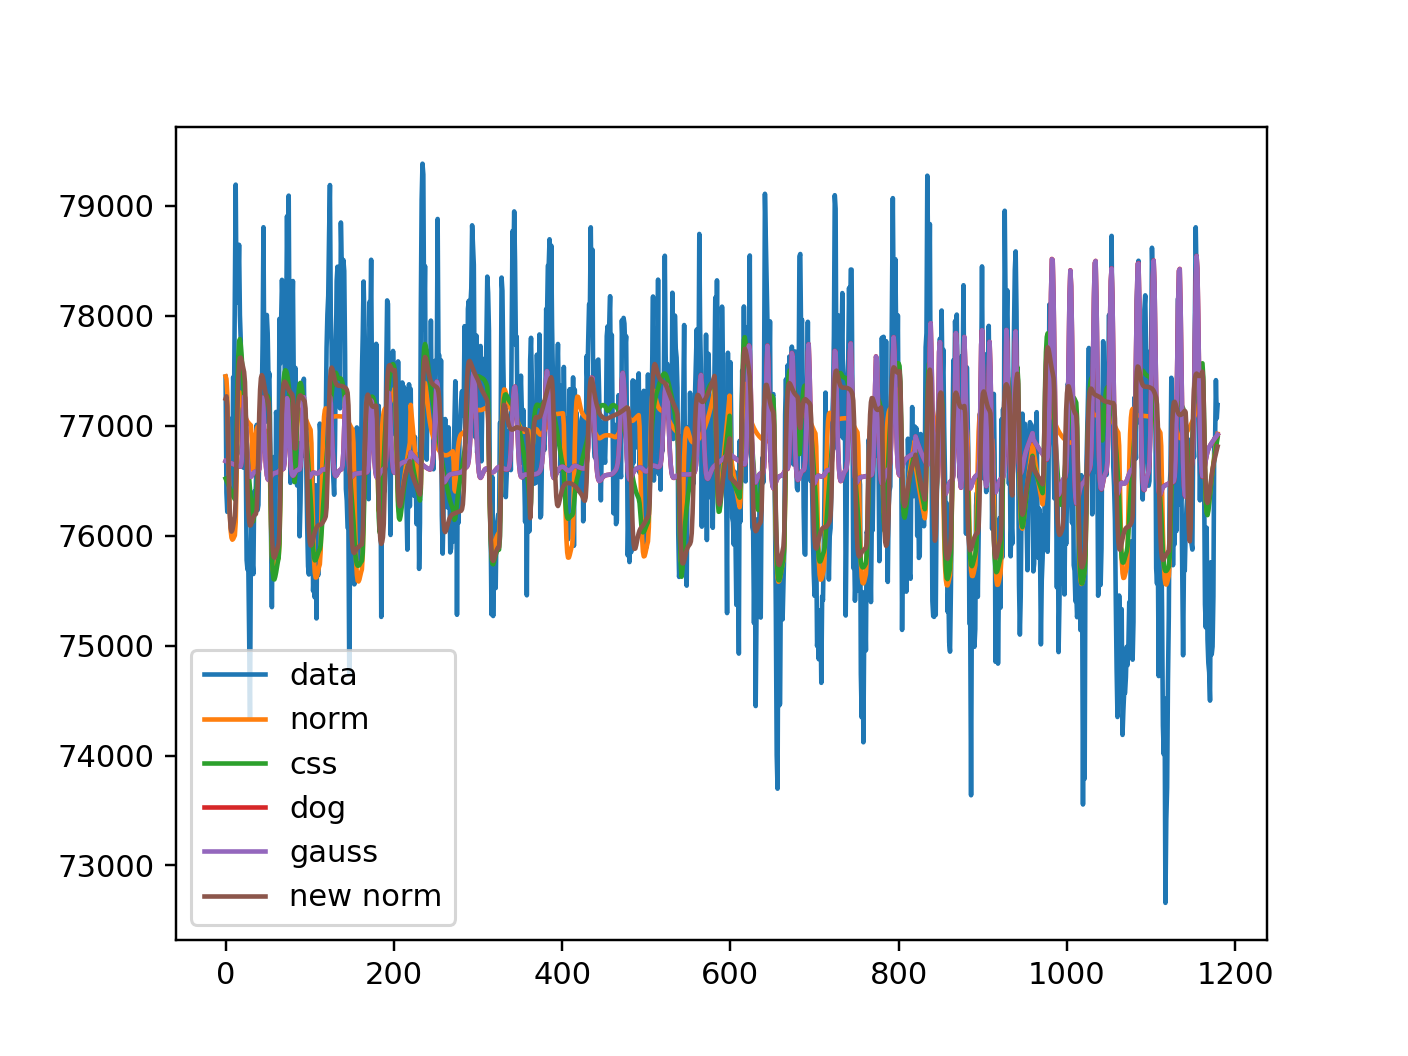

gauss rsq: 0.16338452301092454
css rsq: 0.322287968575416
dog rsq: 0.16338764252212656
norm rsq: 0.2238345362632861
new norm rsq: 0.3318883390744439
gauss params
[    0.10672431    -0.43382307     0.63296972    33.32740858
 76606.08177791     0.16338452]
css params
[   -0.80632097    -4.54170216     0.25102093  1366.70248638
 76023.19040825     0.00240401     0.32228797]
dog params
[    0.10690236    -0.43409567     0.63484144    33.32747714
 76606.08181332     0.01265        7.55997892     0.16338764]
norm params
[   -0.51155162    -2.22133032     0.1          -11.28219251
 77096.51072497    28.76701307    29.93600894 -1144.60005714
     1.00291266     0.22383454]
new norm params
[    0.39177605    -4.71981382     1.27947228   147.60325367
 77298.98934984  7533.86670027     1.06232167  -371.24048361
     0.32114993     0.33188834]


In [62]:
%matplotlib notebook
#create timecourses
vox_num=np.argmax((rsq[:,1]-rsq[:,3])*(alpha>0.3))#50370


vox_num = np.sum(nonzerovar_mask[:vox_num])
tc_vox=timecourse[vox_num]



#norm_grid_tc=gg_norm.return_single_prediction(*list(norm_grid[vox_num,:-1]))
norm_tc=gg_norm.return_single_prediction(*list(norm_res[vox_num,:-1]))
gauss_tc=gg.return_single_prediction(*list(gauss[vox_num,:-1]))
css_tc=gg_css.return_single_prediction(*list(css_res[vox_num,:-1]))
dog_tc=gg_dog.return_single_prediction(*list(dog_res[vox_num,:-1]))
norm_updated=gg_norm.return_single_prediction(*list(gf_norm.iterative_search_params[0]))


fig=pl.figure()
pl.plot(tc_vox, label='data')
pl.plot(norm_tc, label='norm')
pl.plot(css_tc,label='css')
pl.plot(dog_tc,label='dog')
pl.plot(gauss_tc,label='gauss')
pl.plot(norm_updated,label='new norm')
pl.legend()

print("gauss rsq: "+str(1-np.sum((tc_vox-gauss_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("css rsq: "+str(1-np.sum((tc_vox-css_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("dog rsq: "+str(1-np.sum((tc_vox-dog_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("norm rsq: "+str(1-np.sum((tc_vox-norm_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("new norm rsq: "+str(1-np.sum((tc_vox-norm_updated)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
#print(1-np.sum((tc_vox-gauss_tc)**2)/(1180*np.var(tc_vox)))

print("gauss params")
print(gauss[vox_num])
print("css params")
print(css_res[vox_num])
print("dog params")
print(dog_res[vox_num])
print("norm params")
print(norm_res[vox_num])
print("new norm params")
print(gf_norm.iterative_search_params[0])


In [ ]:
inf = np.inf
eps = 1e-1
ss = prf_stim.screen_size_degrees

gf_norm = Norm_Iso2DGaussianFitter(data=tc_vox.reshape(-1,tc_vox.shape[-1]),
                                       gridder=gg_norm,
                                       n_jobs=1)

In [60]:
gf_norm.iterative_fit(rsq_threshold=0, verbose=True,
                              starting_params=gf_norm.iterative_search_params,#norm_res[vox_num].reshape(-1,norm_res[vox_num].shape[-1]),
                                      bounds=[(-10*ss, 10*ss),  # x
                                               (-10*ss, 10*ss),  # y
                                               (eps, 10*ss),  # prf size
                                               (-inf, +inf),  # prf amplitude
                                               (0, +inf),  # bold baseline
                                               (0, +inf),  # surround amplitude
                                               (eps, 20*ss),  # surround size
                                               (-inf, +inf),  # neural baseline
                                               (1e-6, +inf)],  # surround baseline
                                       gradient_method='numerical',
                                       fit_hrf=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using analytic gradient


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


In [61]:
np.set_printoptions(suppress=True)
print(gf_norm.iterative_search_params[0])
print(gf_norm.iterative_search_params[0] - norm_res[vox_num])

[    0.39177605    -4.71981382     1.27947228   147.60325367
 77298.98934984  7533.86670027     1.06232167  -371.24048361
     0.32114993     0.33188834]
[   0.90332767   -2.4984835     1.17947228  158.88544618  202.47862486
 7505.09968719  -28.87368727  773.35957353   -0.68176273    0.1080538 ]


In [ ]:
anp = gf_norm.iterative_search_params[0]
norm_profile = 